# Feature Engineering


### What is Feature Engineering?
Taking whatever information you have and turning it into numbers that you can use to build your **feature matrix**.

### Buzz words
- Non-numerical data
- Categorical data
- Methods
    - ***One-hot encoding***: Technique which creates extra columns to capture category
    - ***Word counts***: Take each word, count the occurences and put in table
    -***Basis function regression***: Convert linear regression to a polynomial regression.
    -***Imputation***: Strategies for filling in missing data that range from simple (replacing missing values with the mean of the column) to complex (using matrix completion or a robust model)

- Scikit-Learn
    - `DictVectorizer`: Used for ***one-hot encoding***
    - `CountVectorizer`: Used for ***word-counts***
    - `LinearRegression`
    - `Polynomial Features`
    - `Imputer`: Uses mean, median, or mode to impute missing data
    - `Pipeline`: Imputes, transforms, and fits
- Pandas
    - `DataFrame`
    
### Questions to answer
1. How to deal with categorical features?
2. How to deal with text features?
3. How to deal with image features?
4. When to use derived features?

### Cons
***One-hot encoding***: Greatly increases size of dataset


# Categorical Features

In [3]:
data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

Use of ***one-hot encoding*** creates extra columns indicating the presence or absense of a category. Scikit-Learn's `DictVectorizer` does this for you.

Note: The 'neighborhood' columnhas been expanded into 3 separate columns.

In [5]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

DictVectorizer(dtype=<class 'int'>, sparse=False)


array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

In [6]:
vec.get_feature_names()

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

#### Sparse Outputs
Many Scikit-Learn estimators accept sparse inputs. Show below

In [7]:
vec = DictVectorizer(sparse=True, dtype=int)
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

# Text Features

One common need in feature engineering is to convert text to a set of numbers via ***word counts***. Scikit's `CountVectorizer` does this.

In [9]:
sample = ['problem of evil',
          'evil queen',
          'horizon problem']

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

Pandas' `DataFrame` makes this easier to inspect.

In [11]:
import pandas as pd
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


# Image Features

Simplist approach is to use pixel values and use approach for digits data mentioned in the [Introducing Scikit-Learn section ](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html).

Comprehensive coverage is in the [Scikit-Image project](http://scikit-image.org/) and [Feature Engineering: Working with Images.](https://jakevdp.github.io/PythonDataScienceHandbook/05.14-image-features.html)

# Derived Features

One type of feature is mathematically derived from some input features. An example is converting a *linear* regression into a *polynomial* regression not by changing the model, but the input! This is called ***basis function regression***.

The following data cannot be well described by a straight line:

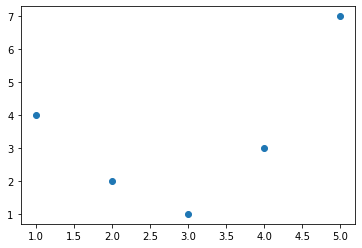

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y);


[2.  2.7 3.4 4.1 4.8]


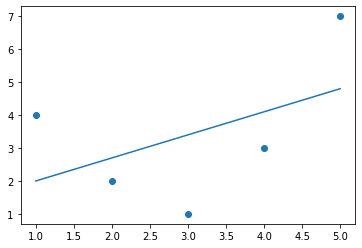

In [18]:
from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit);

### Need more sophisticated model

Find 2nd or in this case, 3rd degree polynomials.

In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
print(X2)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


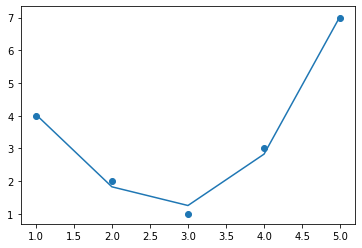

In [22]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit);

# Imputation of Missing Data

In [25]:
from numpy import nan
X = np.array([[ nan, 0,   3  ],
              [ 3,   7,   9  ],
              [ 3,   5,   2  ],
              [ 4,   nan, 6  ],
              [ 8,   8,   1  ]])
y = np.array([14, 16, -1,  8, -5])

`Imputer` replaces the two missing values with the mean of the remaining values in the column,

In [30]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
X2 = imp.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

[0 1 2]


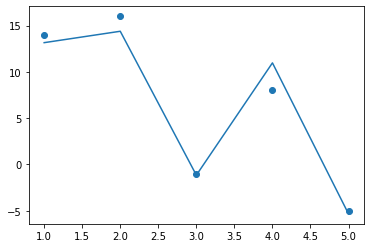

In [34]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit);

# Feature Pipelines

1. Impute missing values using mean
2. Transform features to quadratic
3. Fit a linear regression

Scikit uses a `Pipeline` object to streamline steps.

In [36]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(SimpleImputer(strategy='mean'),
                      PolynomialFeatures(degree=2),
                      LinearRegression())

In [37]:
model.fit(X, y)  # X with missing values, from above
print(y)
print(model.predict(X))

[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]
